In [73]:
import numpy as np
import math, random
from matplotlib import pyplot as plt

In [81]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,
                    10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,
                    6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
                    4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                    1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,
                          48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,
                          23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                          36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,
                          30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,
                          16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,
                          40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,
                          33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,
                          35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,
                          32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
                          31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,
                          15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [69]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2
def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

In [70]:
def error(alpha, beta, x_i, y_i):
    return y_i-predict(alpha, beta, x_i)
def predict(alpha, beta, x_i):
    return beta*x_i + alpha

In [71]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    ppath=[]  # track the path of theta
    while iterations_with_no_improvement < 100:  
        par=[]
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        if value < min_value:
            # if we've found a new minimum, remember it and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
        ncount=0
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            ncount+=1
            par.append(theta)
        ppath.append(par)
    return min_theta, ppath

In [76]:
random.seed(0)
theta = [random.random(), random.random()]
para, par_path = minimize_stochastic(squared_error,squared_error_gradient,num_friends_good,daily_minutes_good,theta,0.0001)

In [10]:
print(para[0],' ',para[1])

22.93746417548679   0.9043371597664965


In [19]:
print(par_path[1][:1])

[[1.4194717105258645, 2.629198795283672]]


In [114]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt

In [77]:
alp0, bet0 =zip(*par_path[-5])
alp1, bet1 =zip(*par_path[-4])
alp2, bet2 =zip(*par_path[-3])
alp3, bet3 =zip(*par_path[-2])
alp4, bet4 =zip(*par_path[-1])

Text(0, 0.5, '$\\beta$')

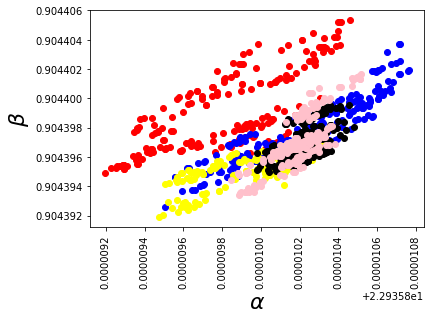

In [78]:
plt.plot(alp0, bet0, 'o', color='red')
plt.plot(alp1, bet1, 'o', color='blue')
plt.plot(alp2, bet2, 'o', color='yellow')
plt.plot(alp3, bet3, 'o', color='black')
plt.plot(alp4, bet4, 'o', color='pink')
plt.xticks(rotation=90)
plt.xlabel(r'$\alpha$',fontsize=22)
plt.ylabel(r'$\beta$',fontsize=22)